### Import the modules that we'll be using in this project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's load the datasets and inspect them.

In [103]:
df = pd.read_csv('all_data.csv')
df = df.rename(columns={'Life expectancy at birth (years)': 'Life expectancy'})
df.head(10)

,Country,Year,Life expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
 4   logGDP           96 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB


In [41]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

# These are the question we will answer.
- Has GDP increased over time?
- Has life expectancy increased over time?
- Is there a correlation between GDP and life expectancy?

### Let's look at the changes in GDP over the years 

<AxesSubplot:xlabel='Year', ylabel='GDP'>

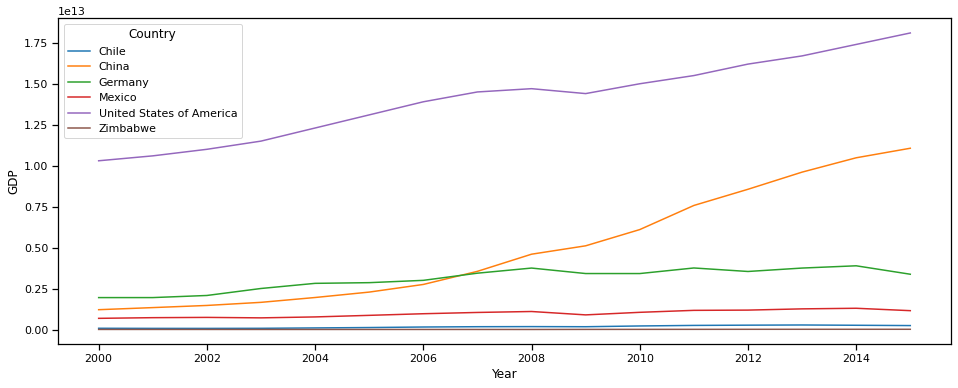

In [95]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.set_context('notebook')
sns.lineplot(x='Year', y='GDP', data=df, hue='Country')

### Separate plot for small economies

<AxesSubplot:xlabel='Year', ylabel='GDP'>

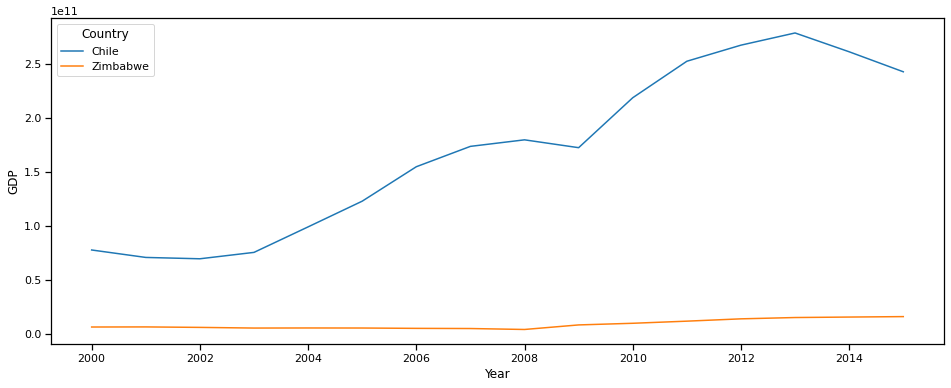

In [96]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Year', y='GDP', data=df[df.GDP <0.05e13], hue='Country')

### Changes in Life expectancy over the years

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

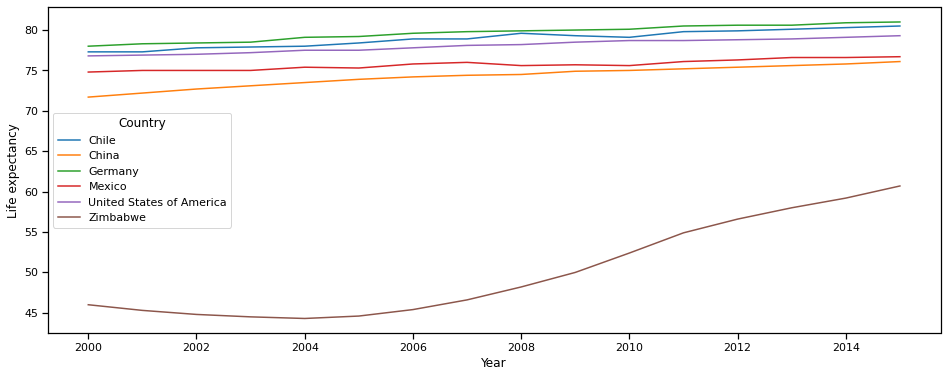

In [97]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x='Year', y='Life expectancy', data=df, hue='Country')

### Let's see is there a correlation between GDP and life expectancy

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy'>

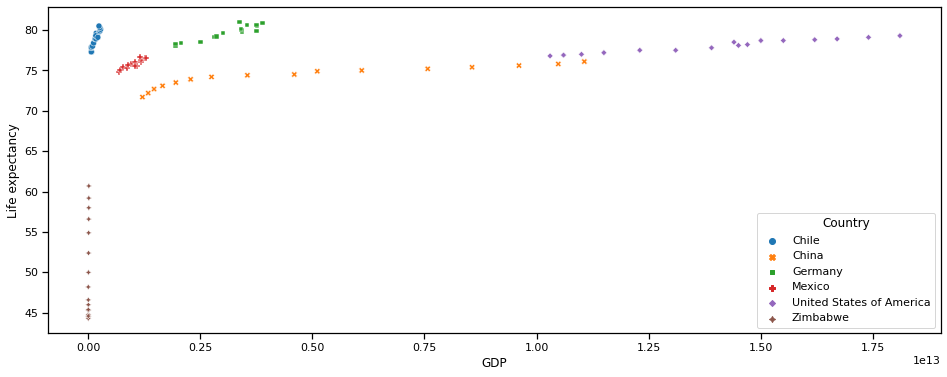

In [98]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(x='GDP', y='Life expectancy', data=df, hue='Country', style='Country')

##### It is difficult to understand this plot for Zimbabwe due to the large difference with the GDP of other countries.
##### Let's log the GDP values and build new plot 

<AxesSubplot:xlabel='logGDP', ylabel='Life expectancy'>

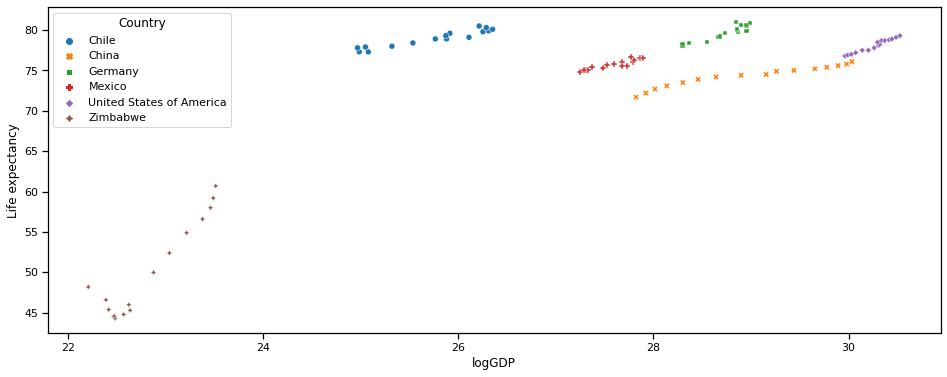

In [104]:
df['logGDP'] = df.GDP.apply(np.log)
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(x='logGDP', y='Life expectancy', data=df, hue='Country', style='Country')

### Also let's build plot for each country separately

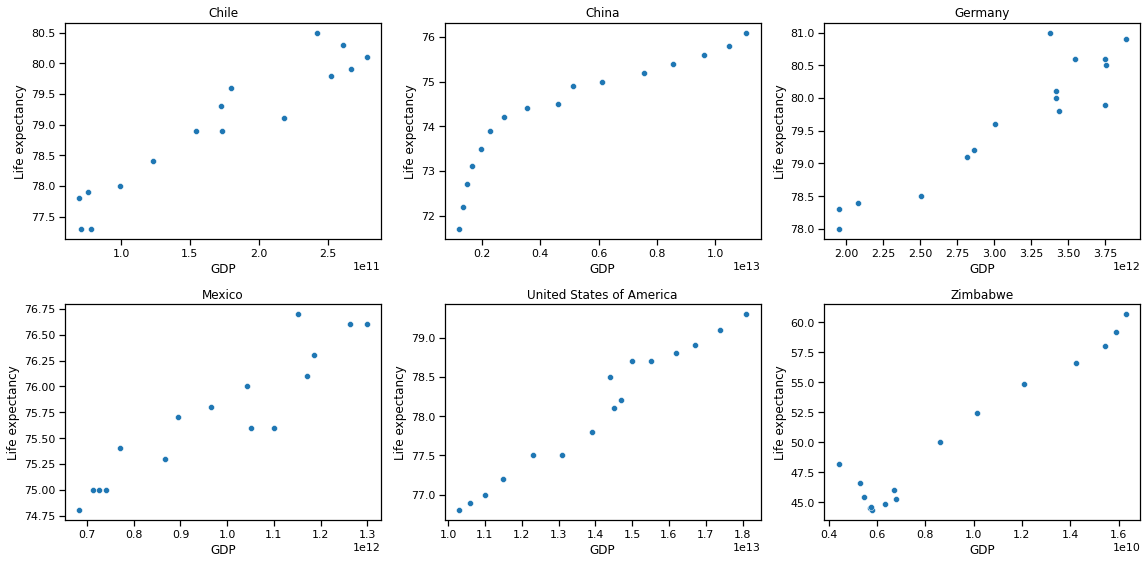

In [101]:
countries = df.Country.unique()
def scatter_builder(x, y, num):
    fig = plt.figure(figsize=(16, 8))
    for i in range(num):
        plt.subplot(2, 3, i+1)
        sns.scatterplot(x=x, y=y, data=df[df.Country==countries[i]])
        plt.title(countries[i])
    plt.tight_layout()
    plt.show
scatter_builder('GDP', 'Life expectancy', 6)

#### Now let's plot the correlation between GDP and life expectancy for each country

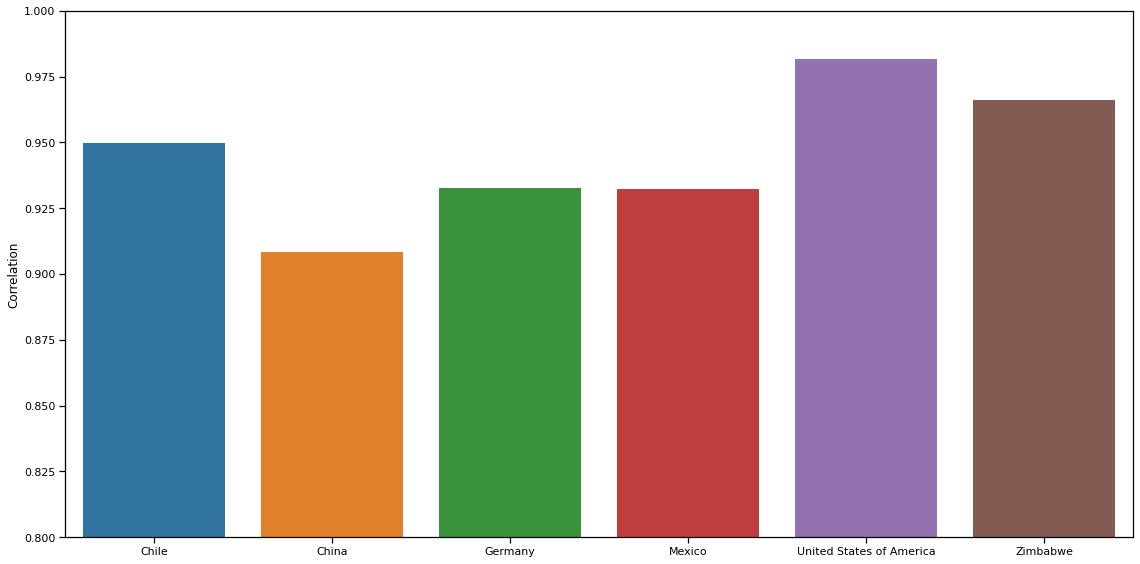

In [102]:
def corr_plot(lst):
    corr_list = []
    plt.figure(figsize=(16, 8))
    for i in range(len(lst)):
        corr = df[df.Country==lst[i]][['GDP', 'Life expectancy']].corr().reset_index()
        corr = corr['Life expectancy'][0]
        corr_list.append(corr)
    sns.barplot(x=lst, y=corr_list)
    plt.ylabel('Correlation')
    plt.ylim(.8, 1)
    plt.tight_layout()
    plt.show()

corr_plot(countries)

### Conclusion
After we have built all these graphs, we can answer the questions at the beginning of the project.
We see that during the period under review, GDP increased in all 6 countries.
Life expectancy also increased in all 6 countries.
We have built plots describing the correlation between GDP and life expectancy for each country. We also calculated the Pearson correlation for these two parameters. The correlation level for different countries ranged from 0.91 to 0.98.
Based on these data, we can conclude that GDP is one of the parameters that affects the change in life expectancy in the country.